# Predicting Loan Defaulters

#### Problem:
In  the  CSV  file  that  accompanies  this  document  are  a  set  of  loans  issued  between October 2014 and September 2015.  The performance of these loans has beenobserved through October 2015.As of October 2015, each loan was marked (in the column loan status) as "Current", "Fully Paid", or "Charged Off".  "Current" means that the borrower is either on or ahead of schedule in terms of paying off his or her loan.  "Fully Paid" means that the loan has been entirely paid off.  "Charged Off" means that the borrower has stopped paying and defaulted on the loan. In addition to loan status, other variables included in the dataset are a unique member  id,  loan  amount,  interest  rate,  the  date  the  loan  was  issued,  lower  and upper endpoints of the range of the borrower's FICO score, annual income, and the date of the last payment that was made by the borrower.
 -  What is the relationship between FICO score and interest rate?
 -  What is the relationship between loan size and interest rate?
 -  Does it seem like the size of a loan and/or the borrower's FICO score are related to whether or not the loan ends up being charged off?  How might this relate to your answer to the previous question?
 -  What percentage of loans have been charged off as of October 2015?
 -  Some of the loans which are marked "Current" in October 2015 will endup being charged off before they are paid in full. Using the fact that all of these loans are 3 years in length, estimate the probability that a randomly chosen loan would eventually become charged off, possibly after October 2015. Be sure to explain any assumptions you make.
 
This notebook has Tableau graph inserts. Every insert is interactive. Actions that can be performed with download of notebook are :
 - Zoom, pan, select using side toolbar
 - Filter using legend, if present

### What is the relationship between FICO score and interest rate?

The graph shows the relationship of FICO score and interest rate.
 
![title](ficovsint1.png)

Observations:
 -  There is a negative correlation between Fico score and interest rate. As the fico score increases, the rate of interest drops.

### What is the relationship between loan size and interest rate?

The graph shows the relationship between loan amount and interest rate.
  
![title](amtvsint.png)

Observations:
 -  Interest rate band of 20% - 25%
  -  Dense for loan amount below 10k, becomes less dense 10k to 20k and beyond 20k is very sparse.
 -  Interest rate band of 10% - 20%
  -  Dense for loan upto 25k, and becomes sparse beyond that
 -  Interest rate band 5% - 10%
  -  Less dense upto 5k, then dense from 5k to 15k. Becomes less dense after that, trailing off after 30k

Now, lets introduce FICO score into the same graph. For readability, FICO has been binned, with bin size = 50.

In [147]:
%%HTML
<div class='tableauPlaceholder' id='viz1511640852541' style='position: relative'><noscript><a href='#'><img alt='Loan Amt : Interest Rate&#47; FICO ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;KF&#47;KFTKGDRP8&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;KFTKGDRP8' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;KF&#47;KFTKGDRP8&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1511640852541');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.60)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

The above is a plot of Loan amount vs Interest rates, based on FICO scores.
Clicking on the legend (Avg fico(bin)) will filter data points for each bin. 

Not surprising that a borrower's FICO score affects the relationship between loan amount and interest rate.
Observations:
 -  Increase in FICO sees a decrease in number of loans. Low FICO scorers borrow many more loans than high FICO scorers.
 -  Increase in FICO also sees a decrease in the interest rate. Irrespective of loan amount, the high FICO borrowers get awarded a low interest rate.
 -  Lower FICO borrowers are majorly awarded lower amount loans with higher interest rates.
 
 
### Does it seem like the size of a loan and/or the borrower's FICO score are related to whether or not the loan ends up being charged off?  How might this relate to your answer to the previous question?

Lets first look at the relationship of Loan Amount to Loan Status. We need to find if the loan amount influences the charge off ratio. To do this, we first bin the loan amounts into $5k bins each. Then we find the ratio of the count(loans that charged off)/count(all loans) for each bin. The same calculation has been repated for the sum of loan amounts in each bin.

![title](percentsChargeOff.png)


Observations:
 -  The ratio seems to be almost constant over all bins
 -  Even though a small difference, the ratio of charged off loans drops consistently, and is lowest at $20k loans before increasing again.
 -  Interestingly very low amount and very high amount loans have the same percentage of getting charged off.

Now, lets's examine the relationship between FICO score and Loan Status. Using the same graph as above, we now factored in the FICO score of borrowers. 


In [148]:
%%HTML
<div class='tableauPlaceholder' id='viz1511677529070' style='position: relative'><noscript><a href='#'><img alt='% Charged Off : FICO ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Up&#47;UpstartChallenge&#47;ChargedOffFICO&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UpstartChallenge&#47;ChargedOffFICO' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Up&#47;UpstartChallenge&#47;ChargedOffFICO&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1511677529070');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Observations:
 -  Borrowers with FICO score 850+  default 33.3% of the time on loans valued \$15k-\$20k, but charge off 0% of the time on other loans
 -  Borrowers with FICO score 750-800 default the least
 -  As FICO score increases, percentage of charge offs decrease, except for anomaly just observed
 
The data seems to show that every 1 in 3 borrowers with FICO 850+ will charge off!! Its very interesting that high FICO scorers would have high charge off rates, especially for just one bracket of loan amount. However, there seems to be no other data to support the same. Upon closer inspection of the data, I found that the number of FICO 850+ borrowers who borrowed loans between 15k and 20k are 3 in number, and 1 loan charged off.
 
Obviously, this is too small a set to make any conclusions, and so the previous inference can be discarded. For a clearer picture, I plotted the FICO score bins with the count of loans that were charged off. Click on the legend to display only the charged off loans.


In [149]:
%%HTML
<div class='tableauPlaceholder' id='viz1511679526430' style='position: relative'><noscript><a href='#'><img alt='FICO : Loan Status ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Up&#47;UpstartChallenge&#47;FICOLoanStatus&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='UpstartChallenge&#47;FICOLoanStatus' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Up&#47;UpstartChallenge&#47;FICOLoanStatus&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1511679526430');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.60)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


Observations:
 -  As FICO score increases, number of charged off loans decreases drastically, trailing off to close to 0 around 750+ FICO scores.

However, it still holds that the dataset is too small to make a solid conclusion.
 
### What percentage of loans have been charged off as of October 2015?
The total number of loans present in October 2015 are 221,043. 7 loans were charged off. Thats 0.003%.

### Some of the loans which are marked "Current" in October 2015 will endup being charged off before they are paid in full.  Using the fact that all of these loans are 3 years in length, estimate the probability that a randomly chosen loan would eventually become charged off,  possibly after October 2015.  Be sure to explain any assumptions you make.

In [164]:
# To toggle warnings on and off
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [172]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from imblearn.over_sampling import SMOTE 

#import the data
loan_data = pd.read_excel('upstartloan_data.xlsx')
print(loan_data.columns)
loan_data.head()

Index(['member_id', 'loan_amnt', 'int_rate', 'issue_d', 'loan_status',
       'fico_range_low', 'fico_range_high', 'annual_inc', 'last_pymnt_d'],
      dtype='object')


,member_id,loan_amnt,int_rate,issue_d,loan_status,fico_range_low,fico_range_high,annual_inc,last_pymnt_d
0,35784929,18000,0.0917,2014-10-01,Fully Paid,700,704,150000.0,2015-10-01
1,35914827,14000,0.1167,2014-10-01,Current,670,674,135000.0,2015-10-01
2,35985086,8400,0.0917,2014-10-01,Current,665,669,75000.0,2015-10-01
3,35945193,10000,0.0769,2014-10-01,Current,730,734,94000.0,2015-10-01
4,35754571,2000,0.1299,2014-10-01,Current,680,684,150000.0,2015-10-01


The data consists of features that will not help the model predict with accuracy. We need to remove those columns that contain irrelevant data or data that sees into the future. So, we need to drop the following columns for training:
 -  member_id (irrelevant)
 -  issue_date (not enough data to make conclusive observations)
 -  last_pymnt_d (sees into the future)
 
However, we will initially hold the 'last_pymnt_d' column, to create the data on which final predictions need to be made later.

Also, we have two columns of FICO ranges for each borrower. We take the average of both to reduce redundancy in information.
The 'last_pymnt_d' column needs to be parsed into usable information - the month and year have been extracted.

In [173]:
# For accurate prediction, we filter out columns that are irrelevant or see into the future
loan_data = loan_data[['loan_amnt', 'int_rate',
       'fico_range_low', 'fico_range_high', 'annual_inc', 'last_pymnt_d', 'loan_status']]

# Combine high and low FICO scores into an average score and drop original columns
loan_data['avg Fico'] = (loan_data['fico_range_low'] + loan_data['fico_range_high'])/2
loan_data['month'] = [loan_data['last_pymnt_d'][i].month for i in range(len(loan_data['last_pymnt_d']))] 
loan_data['year'] = [loan_data['last_pymnt_d'][i].year for i in range(len(loan_data['last_pymnt_d']))] 

cols_to_drop = ['fico_range_low','fico_range_high', 'last_pymnt_d']
loan_data.drop(cols_to_drop,axis = 1, inplace=True)
loan_data.head()

,loan_amnt,int_rate,annual_inc,loan_status,avg Fico,month,year
0,18000,0.0917,150000.0,Fully Paid,702.0,10.0,2015.0
1,14000,0.1167,135000.0,Current,672.0,10.0,2015.0
2,8400,0.0917,75000.0,Current,667.0,10.0,2015.0
3,10000,0.0769,94000.0,Current,732.0,10.0,2015.0
4,2000,0.1299,150000.0,Current,682.0,10.0,2015.0


Let's examine the number of records of each loan status. This will give us an idea of the data we can work with.

In [174]:
loan_data['loan_status'].value_counts()

Current        220879
Fully Paid      16484
Charged Off      1683
Name: loan_status, dtype: int64

So we see that 220k loans are 'Current', 16k are 'Fully Paid' and 1.6k are 'Charged off'. Our ultimate goal is to predict which loans will be fully paid and which ones will be charged off. That means that we need to train our model only on records that have loan_status either 'Fully Paid' or 'Charged Off'. The 'Current' loans will not help us predict this, as they give no usable information. So we eliminate these records from the dataset.

In [175]:
# TRAINING DATA
# Filtering data to get only those loans that are either 'Fully Paid' or 'Charged off'
loan = loan_data[(loan_data['loan_status'] == 'Fully Paid') | (loan_data['loan_status'] == 'Charged Off')]
loan.reset_index(inplace=True)
loan.drop('index', axis=1, inplace=True)
loan.drop('month', axis=1, inplace=True)
loan.drop('year', axis=1, inplace=True)

#Info about the dataset
print(loan['loan_status'].value_counts())
loan.info()

Fully Paid     16484
Charged Off     1683
Name: loan_status, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18167 entries, 0 to 18166
Data columns (total 5 columns):
loan_amnt      18167 non-null int64
int_rate       18167 non-null float64
annual_inc     18167 non-null float64
loan_status    18167 non-null object
avg Fico       18167 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 709.7+ KB


C:\Users\msnay\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\msnay\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\msnay\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Simultaneously, we create the data that has to be finally predicted upon. This data contains loans that are 'Current' as of October 2015. 

In [176]:
# TEST DATA
# Filtering data to get only those loans that are 'Current' as of October 2015
to_predict = loan_data[(loan_data['loan_status'] == 'Current') & (loan_data['month'] == 10) & (loan_data['year'] == 2015)]
to_predict.reset_index(inplace=True)
to_predict.drop('index', axis=1, inplace=True)
to_predict.drop('month', axis=1, inplace=True)
to_predict.drop('year', axis=1, inplace=True)
to_predict.drop('loan_status', axis=1, inplace=True)

print(to_predict.info())
print(to_predict.head())

C:\Users\msnay\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\msnay\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\msnay\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\msnay\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219243 entries, 0 to 219242
Data columns (total 4 columns):
loan_amnt     219243 non-null int64
int_rate      219243 non-null float64
annual_inc    219243 non-null float64
avg Fico      219243 non-null float64
dtypes: float64(3), int64(1)
memory usage: 6.7 MB
None
   loan_amnt  int_rate  annual_inc  avg Fico
0      14000    0.1167    135000.0     672.0
1       8400    0.0917     75000.0     667.0
2      10000    0.0769     94000.0     732.0
3       2000    0.1299    150000.0     682.0
4       6000    0.0917     60000.0     727.0


In [177]:
# TRAINING DATA
# We want to replace the loan status objects with numbers that denote the same information. We map Fully Paid to 0 and
# Charged Off to 1.
mapping_dictionary = {"loan_status":{ "Fully Paid": 0, "Charged Off": 1}}
loan = loan.replace(mapping_dictionary)
loan.head()

#shuffle the data to minimize over/underfitting
loan = loan.sample(frac=1).reset_index(drop=True)

In [178]:
# TRAINING DATA
# Divide data into features and target
Xs = loan.drop('loan_status', 1).values
y = loan['loan_status'].values

# Generate training and test sets
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)

# Scale the data
sc = StandardScaler()
Xs_train = sc.fit_transform(Xs_train)
Xs_test = sc.transform(Xs_test)

print("Count of 'Fully Paid' loans : ")
print(np.bincount(y_train)[0])

print("Count of 'Charged Off' loans : ")
print(np.bincount(y_train)[1])

Count of 'Fully Paid' loans : 
13204
Count of 'Charged Off' loans : 
1329


In [179]:
# TEST DATA
to_predict_ori = to_predict

# Scale the data to be predicted upon
to_predict = sc.transform(to_predict)

Having engineered the features and divided the data into a training and testing set, we now apply the model. First we feed the training set into a Random Forest classifier, and print the scores.

In [180]:
#Using a Random Forest classifier to predict loan status
RF = RandomForestClassifier(n_estimators=500)
RF.fit(Xs_train, y_train)
y_pred = RF.predict(Xs_test)
print('Test score: {:.2f}'.format(RF.score(Xs_test, y_test)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))
print("Classification report for Random Forest classifier %s:\n%s\n"
      % (RF, classification_report(y_test, y_pred)))

Test score: 0.90
Confusion matrix:
[[3253   27]
 [ 342   12]]
Classification report for Random Forest classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

          0       0.90      0.99      0.95      3280
          1       0.31      0.03      0.06       354

avg / total       0.85      0.90      0.86      3634




We got a great accuracy%! But looking at the confusion matrix we see that out of all the charged off loans, very few were predicted correctly. That's not a great model. The reason for this is possibly because of the imbalance in the data. The charged off loans are at 9.3% of the total data and fully paid loans at 90.7% of the total data. 
Accuracy usually doesn't do a good job at evaluating performance of imbalanced datasets. Instead, we'll use AUC to evaluate the model. The AUC curve has been drawn below.

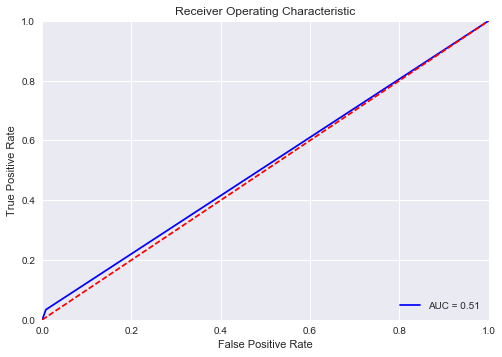

In [181]:
# Generate the AUC curve
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC is almost as bad, if not slightly better than a random model with AUC = 0.5. There's a lot of room for improvement, evident from this curve. We need to find a way to balance the data. One technique commonly used, is to upsample the training set to create a more balanced dataset. We can achieve this using SMOTE. 

C:\Users\msnay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Test score: 0.86
Confusion matrix:
[[3079  201]
 [ 316   38]]
Classification report for Random Forest classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.91      0.94      0.92      3280
          1       0.16      0.11      0.13       354

avg / total       0.83      0.86      0.85      3634




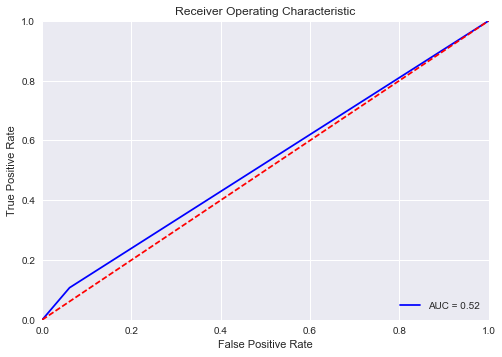

In [182]:
# Generating artificial data for upsampling
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(Xs_train, y_train)

# Feeding new training set into Random Forest 
RF = RandomForestClassifier(n_estimators=500, random_state=12)
RF.fit(x_train_res, y_train_res)
y_pred = RF.predict(Xs_test)
print('Test score: {:.2f}'.format(RF.score(Xs_test, y_test)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))
print("Classification report for Random Forest classifier %s:\n%s\n"
      % (RF, classification_report(y_test, y_pred)))

#Generating the AUC curve for this model
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

With upsampling, accuracy has decreased, but precision and recall for 'Charged Off' loans is better. Even the AUC is better. 
Let's examine a few other models with the upsampled data to find out which gives the best score of AUC. Below we fit the data into a KNN classifier.

Test score: 0.69
Confusion matrix:
[[2389  891]
 [ 222  132]]
Classification report for KNN classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          0       0.91      0.73      0.81      3280
          1       0.13      0.37      0.19       354

avg / total       0.84      0.69      0.75      3634




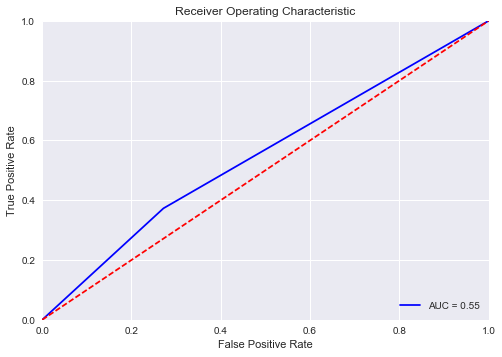

In [183]:
# Apply KNN classifier to training data
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_model_1 = knn.fit(x_train_res, y_train_res)
y_pred = knn_model_1.predict(Xs_test)
print('Test score: {:.2f}'.format(knn_model_1.score(Xs_test, y_test)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))
print("Classification report for KNN classifier %s:\n%s\n"
      % (knn_model_1, classification_report(y_test, y_pred)))


# Generate AUC curve
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The KNN model performs as well as the Random Forest, but it seems like there's still scope for improvement. The Logistic Regression model usually works very well with binary classification, so lets try that. We fit the upsampled data to a Logistic Regression model and plot the AUC curve.

Test score: 0.63
Confusion matrix:
[[2076 1204]
 [ 126  228]]
Classification report for Logistic Regression classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       0.94      0.63      0.76      3280
          1       0.16      0.64      0.26       354

avg / total       0.87      0.63      0.71      3634




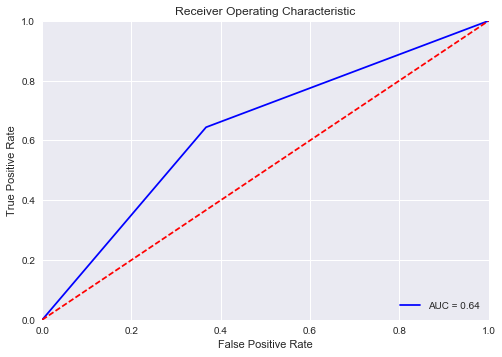

In [184]:
# Apply Logistic Regression to training data
classifier = LogisticRegression(random_state = 0)
logreg_model = classifier.fit(x_train_res, y_train_res)
y_pred = logreg_model.predict(Xs_test)
print('Test score: {:.2f}'.format(logreg_model.score(Xs_test, y_test)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))
print("Classification report for Logistic Regression classifier %s:\n%s\n"
      % (logreg_model, classification_report(y_test, y_pred)))

# Generate AUC curve
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The Logistic Regression model seems to be the best one! It has the highest AUC score and the highest precision and recall for the 'Charged Off' loans. Using this model we now predict the probabilities of the 'Current' loans in October 2015. Below is a table to show the loan data and the probability that it gets 'Charged Off'.

In [185]:
# Predicting probablities of 'Current' loans
final_pred = logreg_model.predict_proba(to_predict)[:,1]
to_predict_ori = pd.DataFrame(to_predict_ori)
to_predict_ori['Probability of being Charged Off'] = final_pred
to_predict_ori.head()

,loan_amnt,int_rate,annual_inc,avg Fico,Probability of being Charged Off
0,14000,0.1167,135000.0,672.0,0.448476
1,8400,0.0917,75000.0,667.0,0.343676
2,10000,0.0769,94000.0,732.0,0.188072
3,2000,0.1299,150000.0,682.0,0.452663
4,6000,0.0917,60000.0,727.0,0.235134


Now that we have the probabilities of each loan being 'Charged Off', we need to decide a cutoff probability, based on the data. Loans above the cutoff would be classified as 'Charged Off' and below would be 'Fully Paid'. 